<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/Transfer_Learning_Class_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

See [here](https://medium.com/@bravinwasike18/building-a-deep-learning-model-with-keras-and-resnet-50-9dd6f4eb3351) for the explanation of the code.

# Preparing The Data

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
/root/.keras/datasets/flower_photos/flower_photos
/root/.keras/datasets/flower_photos/flower_photos/sunflowers/27465811_9477c9d044.jpg


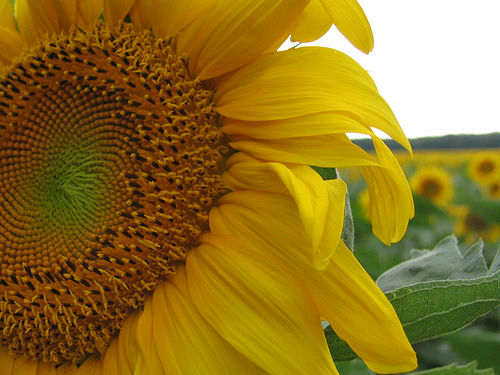

In [3]:
#Dataset: https://www.tensorflow.org/datasets/catalog/tf_flowers
import pathlib
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data+'/flower_photos')
print(flowers_data)

#visualizing a sunflower
all_sunflowers = list(flowers_data.glob('sunflowers/*'))
print(all_sunflowers[1])
PIL.Image.open(str(all_sunflowers[1]))

In [4]:
height,width=180,180

training_batch_size=32

train_set = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height,width),
  batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
image_cat = train_set.class_names
print(image_cat)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Training The Model


In [7]:
dnn_model = Sequential()

imported_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in imported_model.layers:
        layer.trainable=False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = dnn_model.fit(
  train_set,
  epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 135ms/step - accuracy: 0.6766 - loss: 1.0196
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.8957 - loss: 0.2816
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9381 - loss: 0.1668
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9543 - loss: 0.1154
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9747 - loss: 0.0713
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9898 - loss: 0.0422
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9965 - loss: 0.0200
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9994 - loss: 0.0089
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 1.0000 - loss: 0.0028


# Making Predictions

In [12]:
# TASK - evaluate the model
import cv2
image=cv2.imread(str(all_sunflowers[1]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
model_pred=dnn_model.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

y_true = np.array([y.numpy() for x, y in test_set.unbatch()])

y_pred = np.argmax(dnn_model.predict(test_set), axis=1)

confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
print(confusion_matrix)

ClassificationModel = dnn_model.save('ClassificationModel.h5')
classificationModel = tf.keras.models.load_model('ClassificationModel.h5')
classificationModel.summary()

accuracy = classificationModel.evaluate(test_set)[1]
print("Accuracy:", accuracy)

(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


The predicted category is sunflowers


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,367 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9112 - loss: 0.3899
Accuracy: 0.8950953483581543
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step
tf.Tensor(
[[20 35 22 27 25]
 [38 39 33 31 35]
 [21 30 22 19 28]
 [24 37 16 41 34]
 [25 26 31 37 38]], shape=(5, 5), dtype=int32)
